# Clustering Homework
Graham Bullard

In [1]:
from sklearn import datasets
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

C:\Users\Graham\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [2]:
iris = datasets.load_iris()
X = iris.data
df = pd.DataFrame(X)
df.columns = iris.feature_names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
def find_k (X, k_range, sample_percent=1):

    N = X.shape[0]
    sampleSize = X.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(X)[0])
        np.random.shuffle(index)
        X =  X[index, :]


    mean_distortions=[]
    for k in k_range:
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(X)
        mean_distortions.append(sum(np.min(pairwise_distances(X, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / X.shape[0])


    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

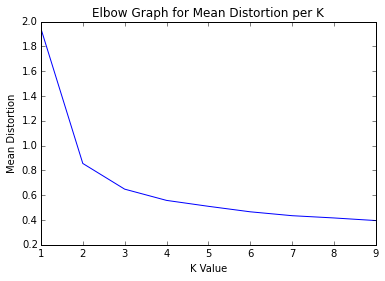

In [4]:
find_k(np.matrix(X), range(1,10),1)

From the above graph, there are 3 K-means clusters.

In [5]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_scaled)
df['labels'] = kmeans_model.labels_

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1
